In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import joblib
import pandas as pd
from skimage.color import rgb2lab, lab2rgb

In [ ]:
from ShallowLearn.Indices import mask_land

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Import the ShallowLearn package
import ShallowLearn as sl

In [ ]:
from ShallowLearn import ImageHelper as ih
from ShallowLearn import Transform as tr

In [ ]:
path = "/Volumes/NO NAME"

In [ ]:
models = os.listdir("../Models/")


In [ ]:
tabular_data = os.listdir("../Data/")


In [ ]:
cleaned_data = "/media/ziad/Expansion/Cleaned_Data_Directory"
honduras = os.listdir("/media/ziad/Expansion/Honduras_Clipped")

In [ ]:
models

In [ ]:
model = joblib.load("../Models/" +'pipeline_pca2_kmeans10.pkl')

In [ ]:
file_list = glob.glob(cleaned_data + '/*6880*.tiff')


In [ ]:
file_list

In [ ]:
image_means = {}
for file in file_list:
    image = ih.load_img(file)
    image_means[file] = np.nanmean(image)

In [ ]:
import re

In [ ]:
#  '/Volumes/NO NAME/Cleaned_Data_Directory/6880_T55LCD_20210720T003709no_transform.tiff',
#  '/Volumes/NO NAME/Cleaned_Data_Directory/6880_T55LCD_20210730T003709no_transform.tiff',
#  '/Volumes/NO NAME/Cleaned_Data_Directory/6880_T55LCD_20220307T003659no_transform.tiff',
#  '/Volumes/NO NAME/Cleaned_Data_Directory/6880_T55LCD_20220406T003659no_transform.tiff',
#  '/Volumes/NO NAME/Cleaned_Data_Directory/6880_T55LCD_20220526T003709no_transform.tiff'
# Regex statement to extract date from above string

def get_date(string):
    return re.findall(r'\d{8}', string)[0]

# Get the dates from the file names
dates = [get_date(file) for file in file_list]

In [ ]:
# convert dates to pd.datetime objects
dates = pd.to_datetime(dates, format='%Y%m%d')

In [ ]:
# matplotlib plot that plots means against date times
plt.plot(dates, list(image_means.values()), 'o')

In [ ]:
land_masks = {}
for file in file_list:
    image = ih.load_img(file)
    land_masks[file] = mask_land(tr.LCE_multi(image), 'B08', 10)
    image_means[file] = np.nanmean(ih.apply_mask(image, land_masks[file]))

In [ ]:
land_masks = {}
image_files_masked = {}
for file in file_list:
    image = ih.load_img(file)
    land_masks[file] = mask_land(tr.LCE_multi(image), 'B08', 10)
    image_means[file] = np.nanmean(ih.apply_mask(image, ~land_masks[file]))
    image_files_masked[file] = ih.apply_mask(image, ~land_masks[file])

In [ ]:
# matplotlib plot that plots means against date times
plt.plot(dates, list(image_means.values()), 'o')

In [ ]:
import joblib

In [ ]:
models

In [ ]:
model_path = os.path.join("../Models/", 'pipeline_pca2_kmeans10.pkl')

In [ ]:
model = joblib.load(model_path)

In [ ]:
ih.plot_rgb(image_files_masked[file], plot = True)

In [ ]:
ih.discrete_implot(ih.predict_mask(image_files_masked[file], model_path))

In [ ]:
reefs_only = {}
reef_means = {}
for keys, vals in image_files_masked.items():
    mask = np.expand_dims(ih.predict_mask(image_files_masked[file], model_path, mask_val=9), axis = 2)
    reefs_only[keys] = ih.apply_mask(vals, mask)
    #transform image to lab space
    reefs_only[keys] = rgb2lab(ih.plot_rgb(reefs_only[keys]))
    # lce transform the lab image
    reefs_only[keys][:,:,0] = tr.BCET(reefs_only[keys][:,:,0])
    plt.imshow(reefs_only[keys][:,:,0])
    plt.show()
    reef_means[keys] = np.nanmean(reefs_only[keys], axis = (0,1))

In [ ]:
# matplotlib plot that plots means against date times
plt.plot(dates, list(reef_means.values()), 'o')
plt.gca().set_ylim([-2, 2])

In [ ]:
reefs_only = {}
reef_means = {}
for keys, vals in image_files_masked.items():
    mask = np.expand_dims(ih.predict_mask(image_files_masked[file], model_path, mask_val=9), axis = 2)
    reefs_only[keys] = ih.apply_mask(vals, mask)
    #transform image to lab space
    reefs_only[keys] = rgb2lab(ih.plot_rgb(reefs_only[keys]))
    # lce transform the lab image
    try:
        reefs_only[keys][:,:,0] = tr.linear_contrast_enhancement(reefs_only[keys][:,:,0])
        reef_means[keys] = np.nanmean(reefs_only[keys], axis = (0,1))
    except:
        del reefs_only[keys]

In [ ]:
dates = [get_date(file) for file in reefs_only.keys()]

In [ ]:
dates = pd.to_datetime(dates, format='%Y%m%d')

In [ ]:
# extract the first value from the array of means
arr_vals = list(reef_means.values())
arr_vals = [val[0] for val in arr_vals]
# remove the mean from all the values in the array
arr_vals = [val - arr_vals[0] for val in arr_vals]

In [ ]:
# matplotlib plot that plots means against date times
plt.plot(dates, arr_vals, 'o')
# plt.gca().set_ylim([109.9, 110.05])

In [ ]:
# print the outliers in the data of means
for d, v in zip(dates, arr_vals):
    if v < -0.01:
        print(d, v)

In [ ]:
# show the original image data for the outlier
for keys, vals in image_files_masked.items():
    if get_date(keys) == '20190211':
        print(keys)
        ih.plot_rgb(vals, plot = True)
        plt.show()

In [ ]:
ih.predict_mask(image_files_masked[file], model_path, mask_val=4)

In [ ]:
plt.plot(image_means)

In [ ]:
img_test = ih.load_img(file_list[19])


In [ ]:
ih.plot_rgb(tr.BCET_multi(img_test), plot = True)

In [ ]:
ih.plot_lab(tr.BCET_multi(img_test), plot = True)

In [ ]:
ih.plot_histograms(tr.BCET_multi(img_test))

In [ ]:
band_mean = np.mean(tr.BCET_multi(img_test), axis = (0,1))

In [ ]:
img_test = ih.load_img(file_list[25])

In [ ]:
ih.plot_histograms(tr.BCET_multi(img_test))

In [ ]:
plt.imshow(tr.transform_lab_stretch(img_test))

In [ ]:
tr.transform_lab_stretch(img_test).dtype

In [ ]:
ih.plot_rgb(tr.transform_multiband_lab(img_test), plot = True)

In [ ]:
plt.imshow(ih.predict_mask(tr.BCET_multi(img_test), model_path))

In [ ]:
plt.imshow(ih.predict_mask(tr.transform_multiband_lab(img_test), model_path))

In [ ]:
for keys, vals in image_files_masked.items():
    lab_img = tr.transform_multiband_lab(image_files_masked[keys])
    mask = np.expand_dims(ih.predict_mask(lab_img, model_path), axis = 2)
    # reefs_only[keys] = ih.apply_mask(vals, mask)
    plt.imshow(mask)
    plt.show()
    ih.plot_rgb(ih.apply_mask(vals, mask), plot = True)
    plt.show()


In [ ]:
# test predictions on all of the images in the directory after lab transform
for file in file_list:
    img_test = ih.load_img(file)
    plt.imshow(ih.predict_mask(tr.transform_multiband_lab(img_test), model_path))
    plt.show()
    ih.plot_rgb(tr.transform_multiband_lab(img_test), plot = True)
    plt.show()

In [ ]:
from ShallowLearn.Indices import calculate_water_surface_index, calculate_pseudo_subsurface_depth, calculate_subsurface_depth

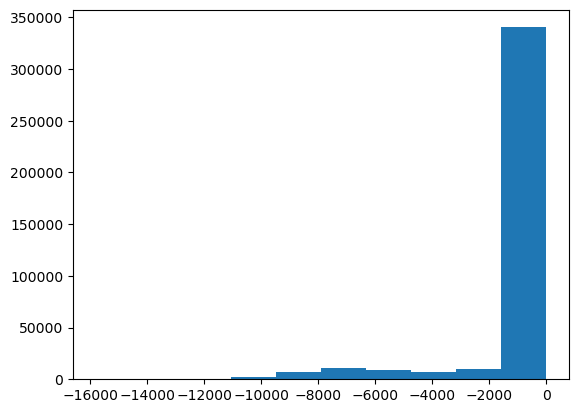

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


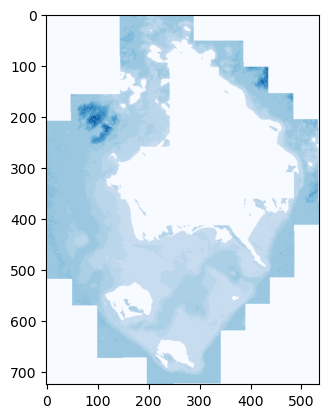

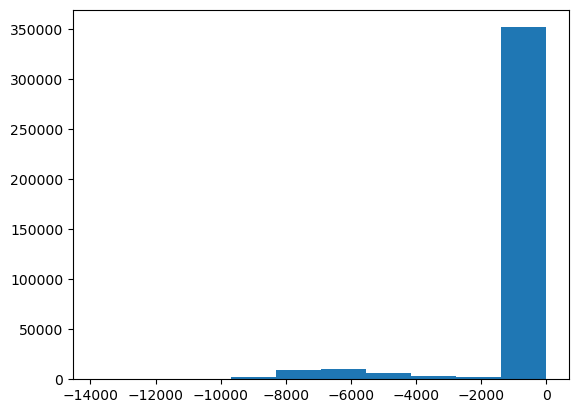

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


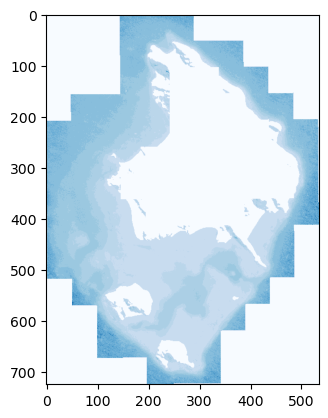

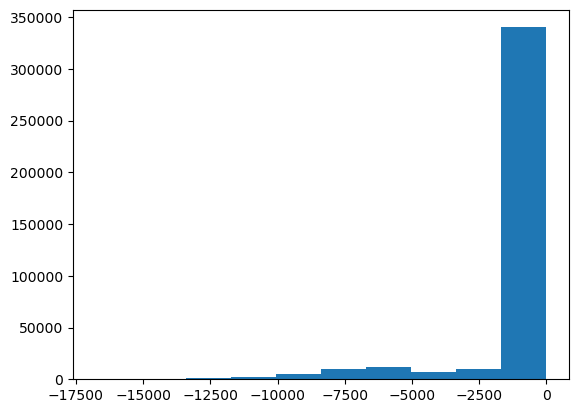

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)


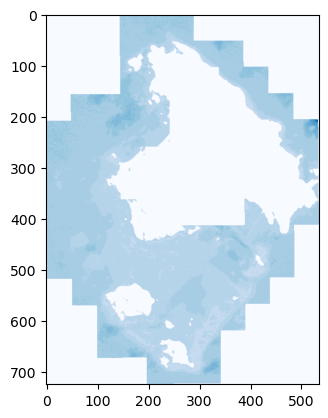

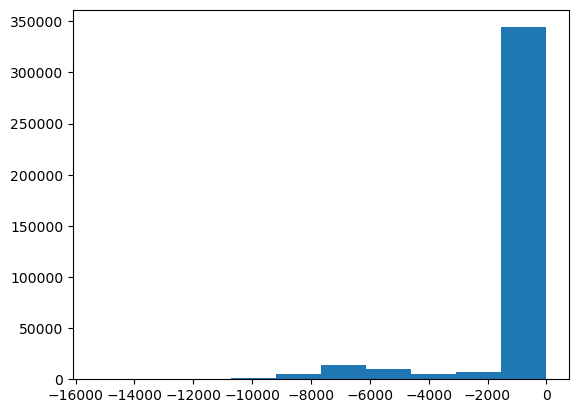

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


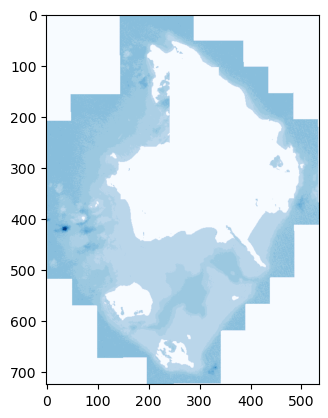

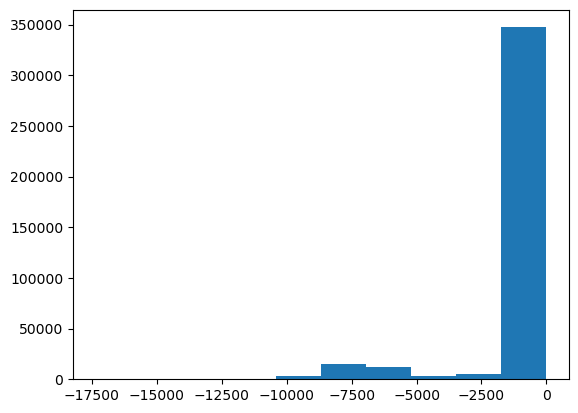

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


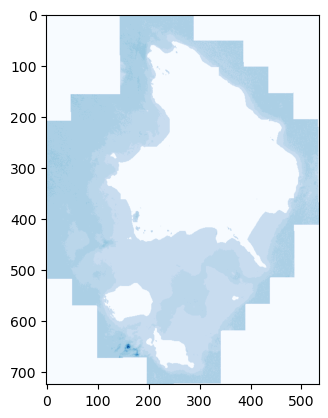

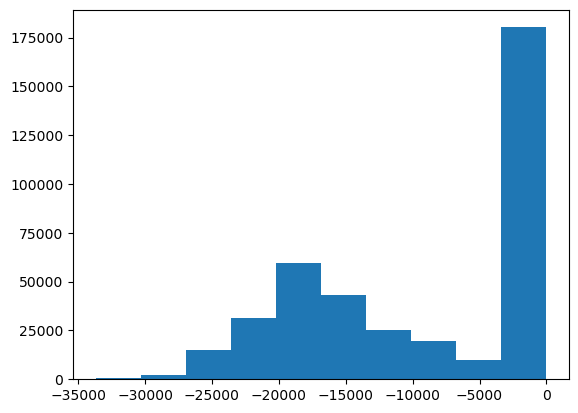

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)


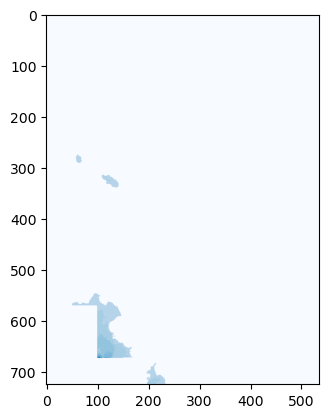

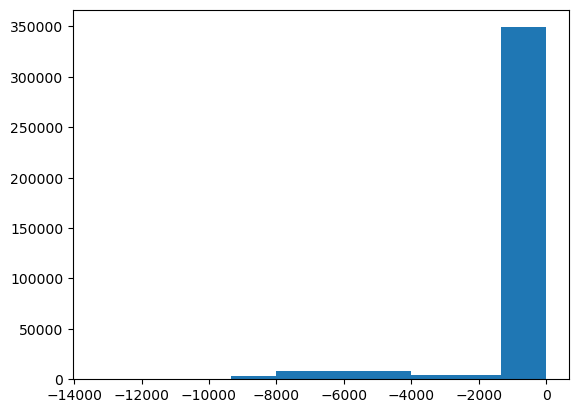

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)


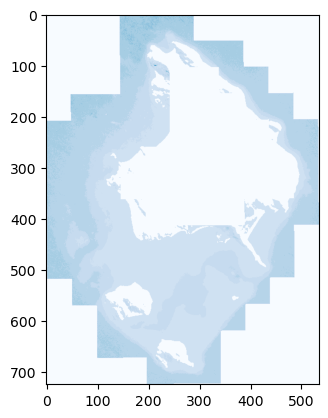

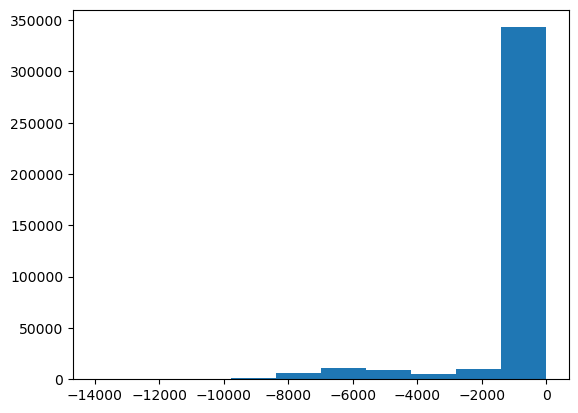

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)


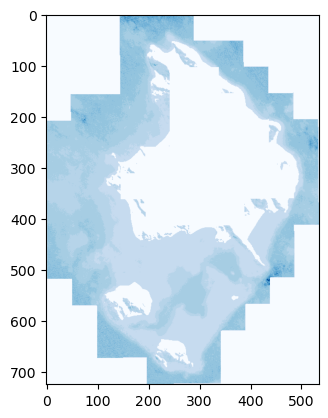

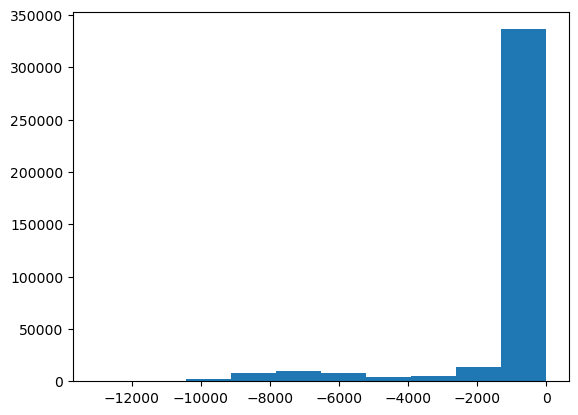

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


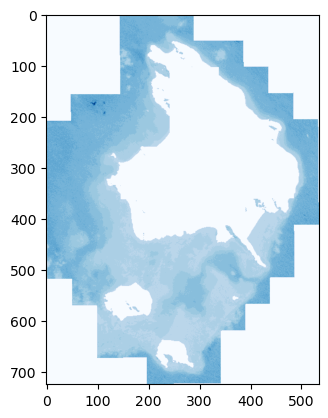

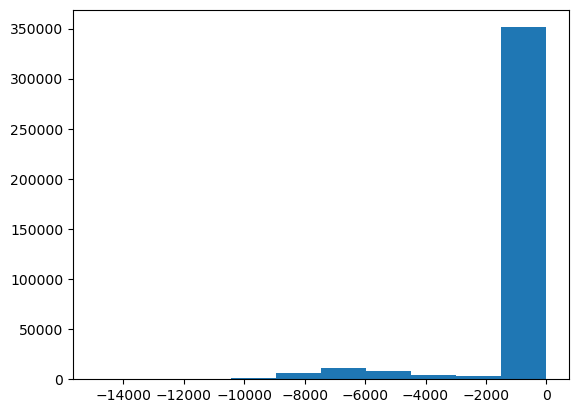

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


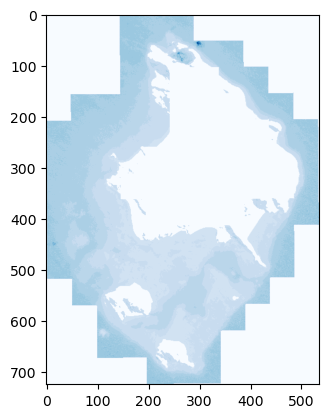

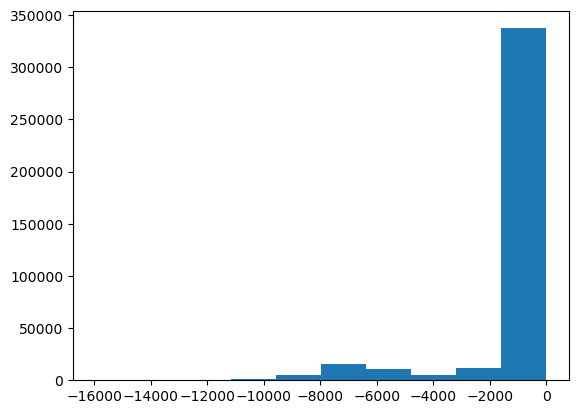

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


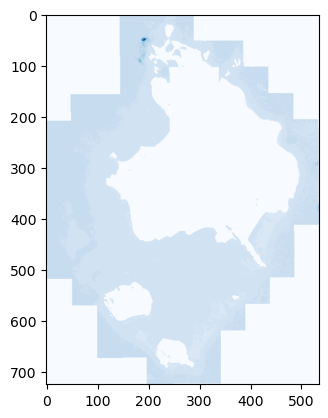

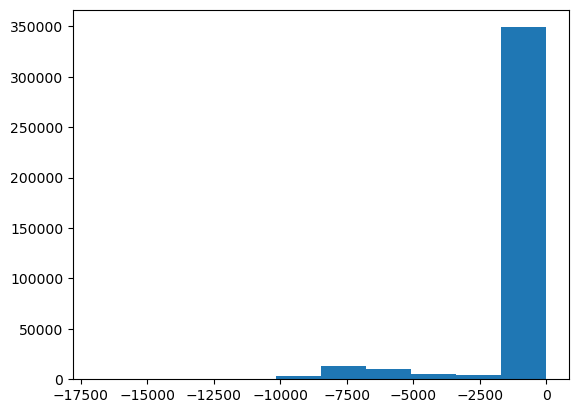

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


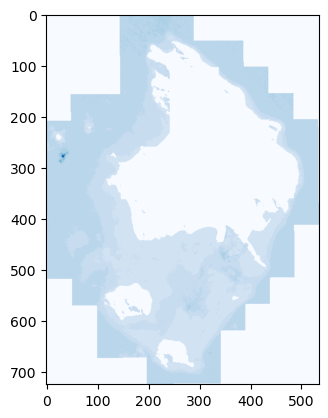

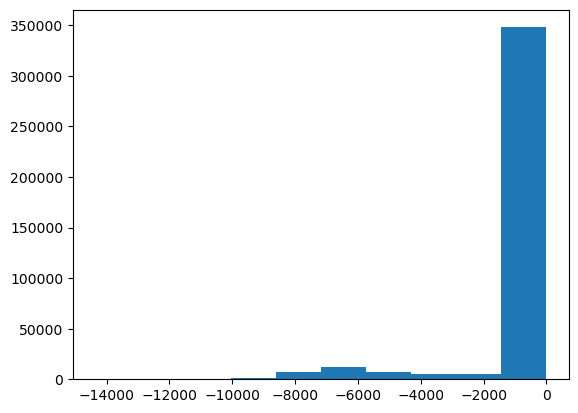

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)


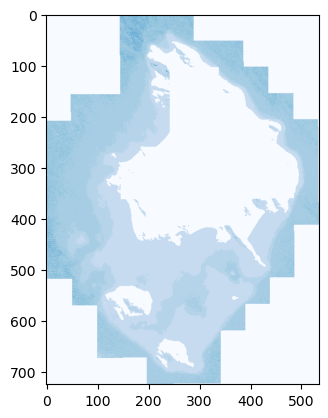

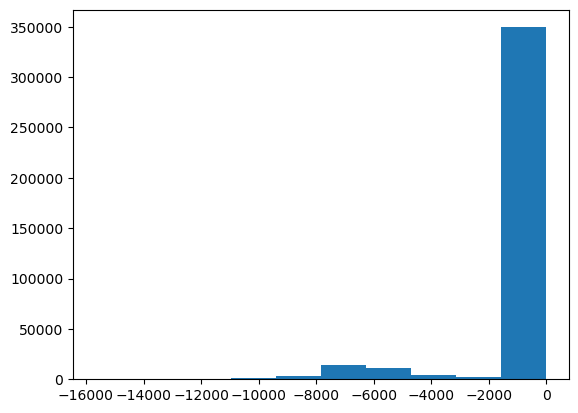

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


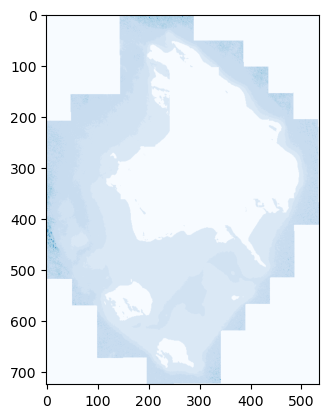

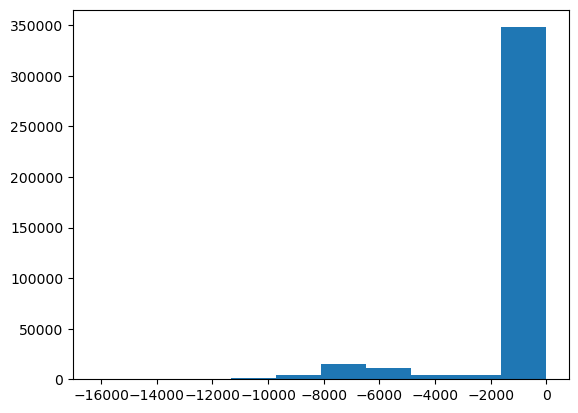

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


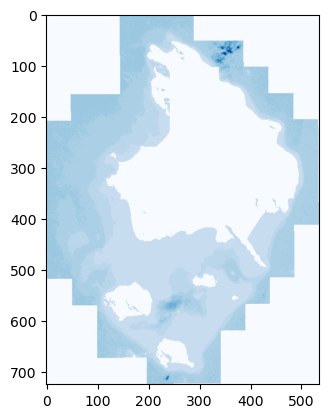

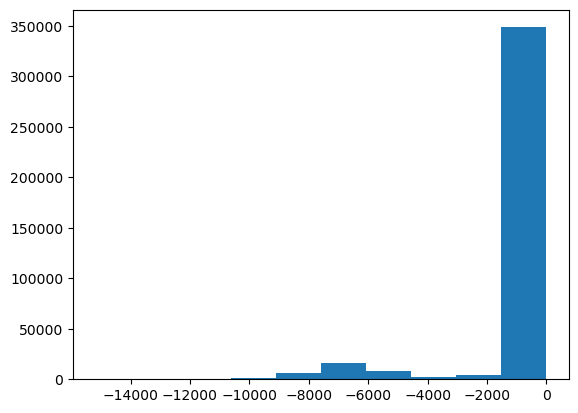

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


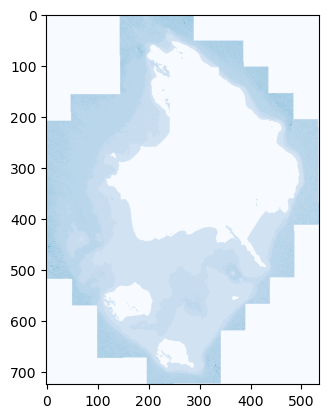

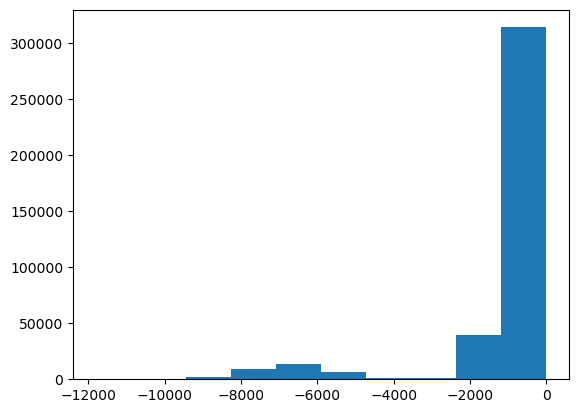

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


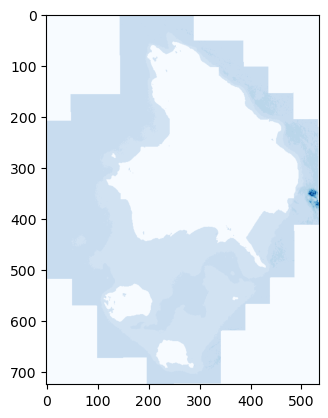

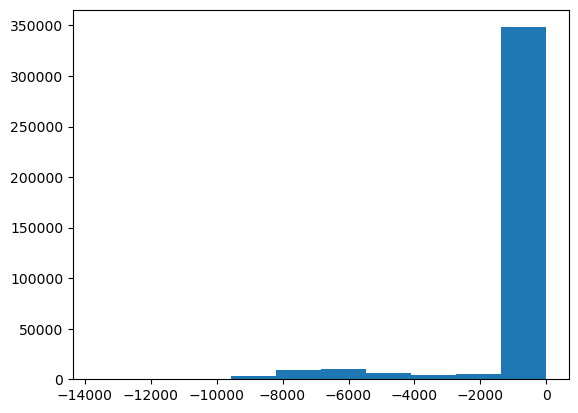

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


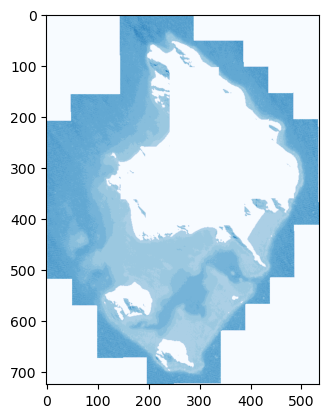

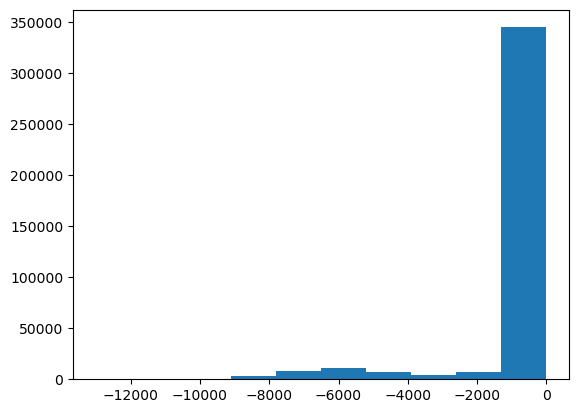

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


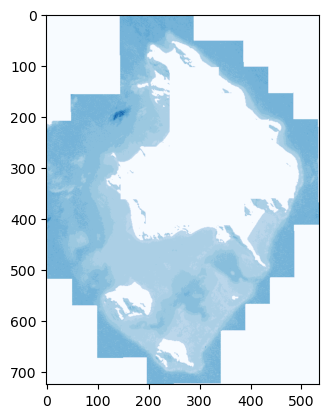

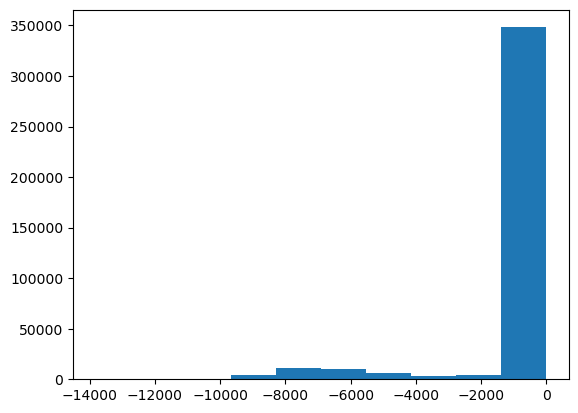

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


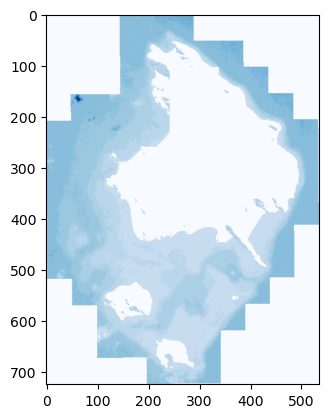

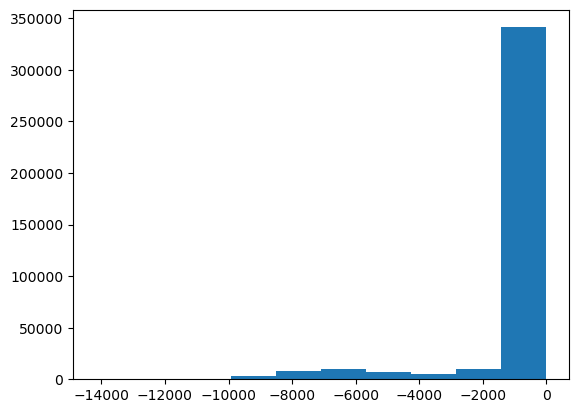

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


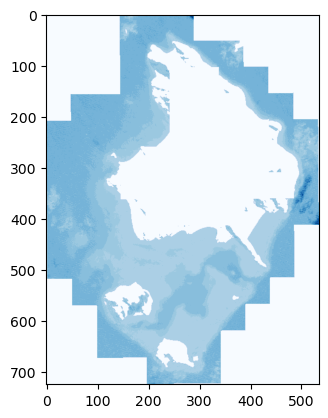

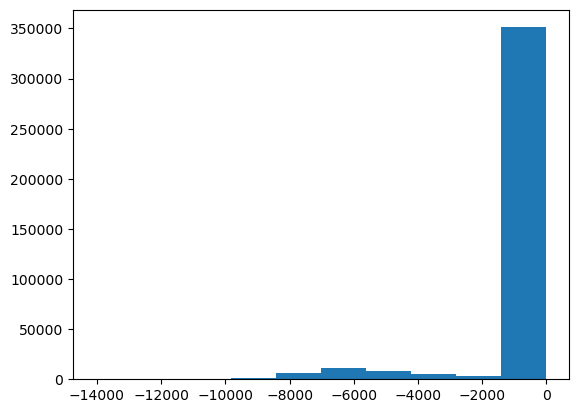

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


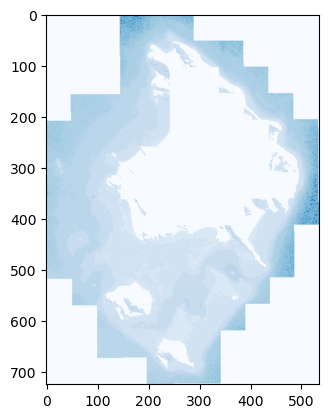

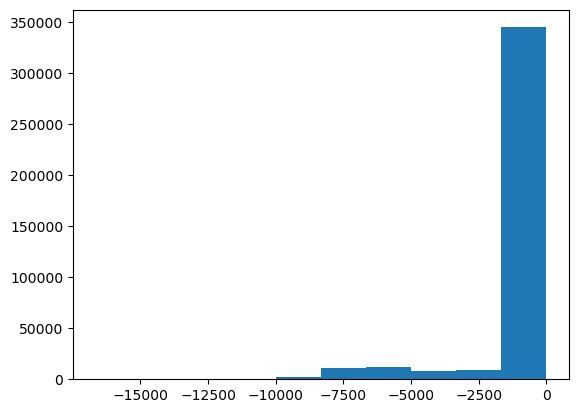

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


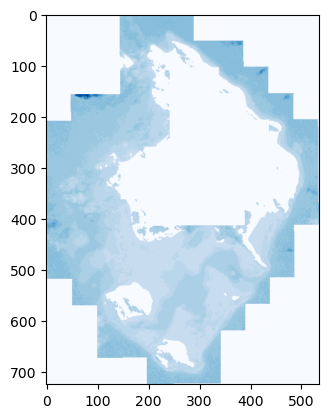

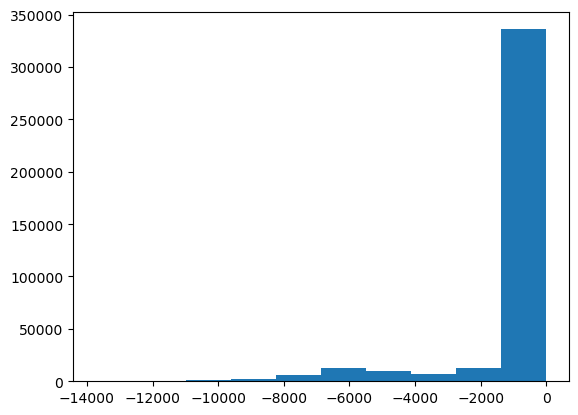

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


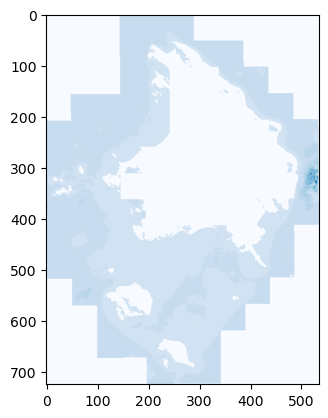

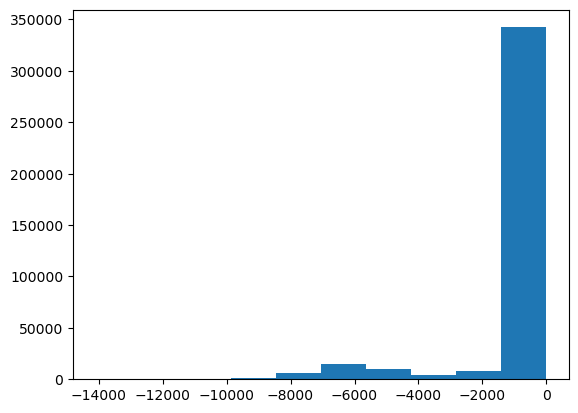

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


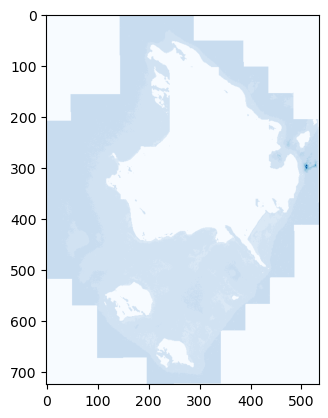

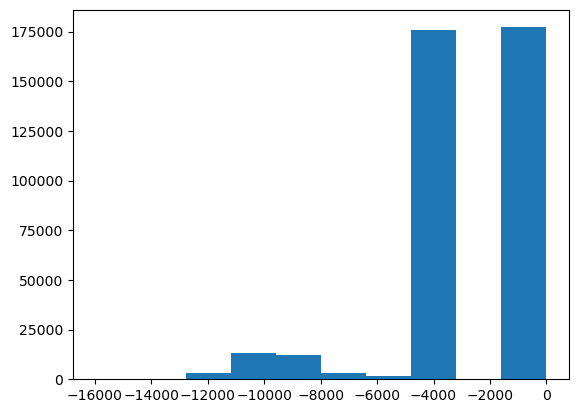

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


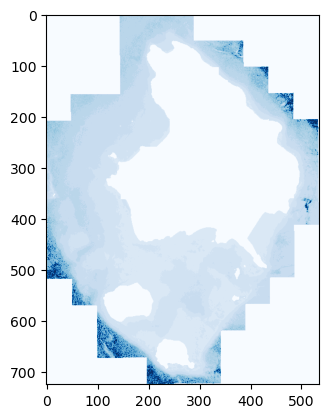

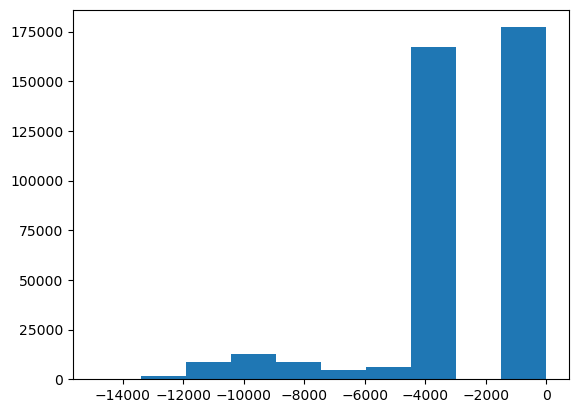

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


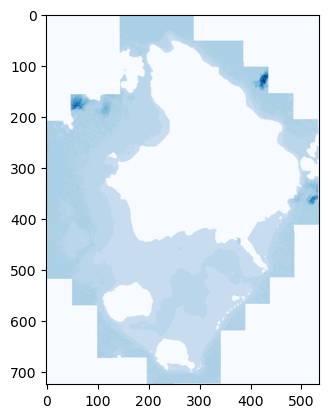

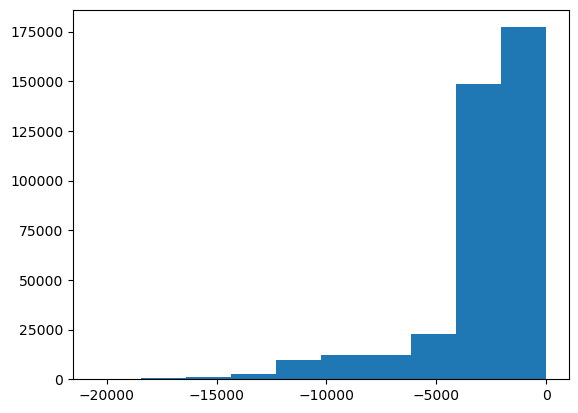

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


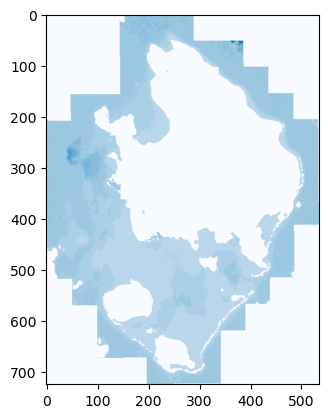

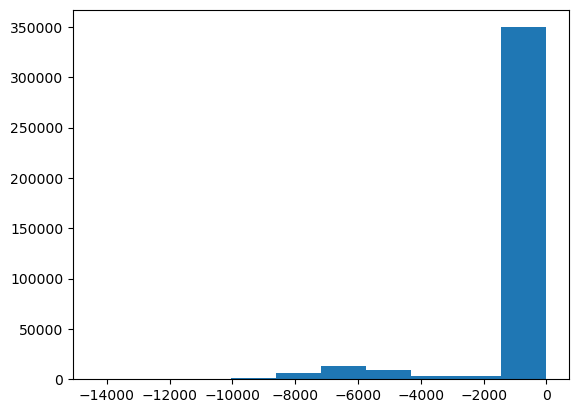

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


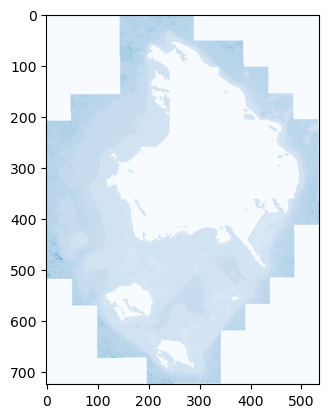

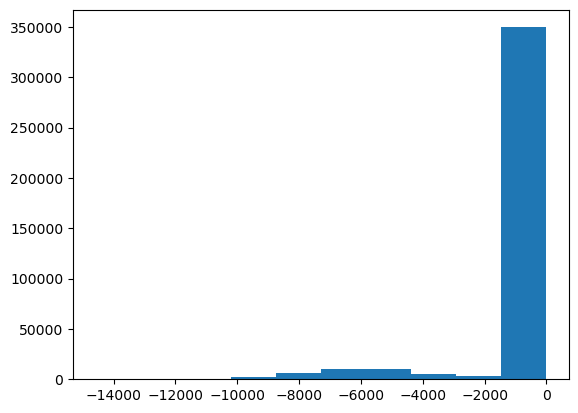

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


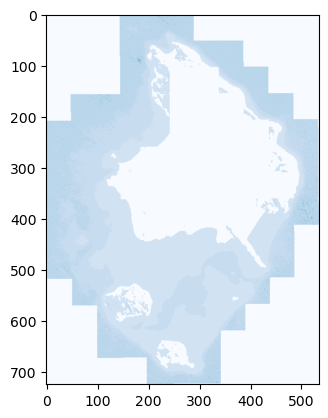

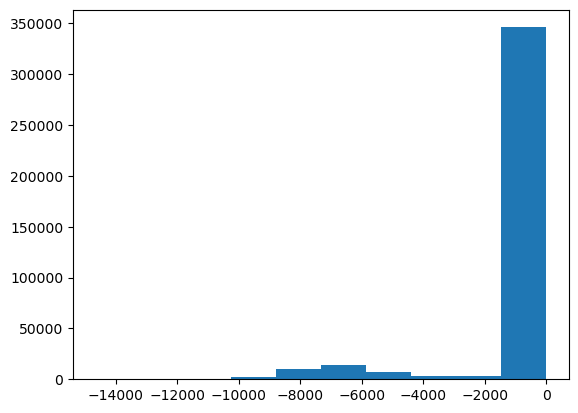

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


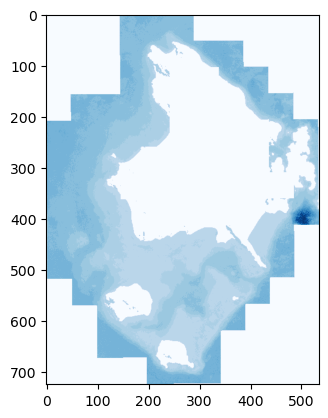

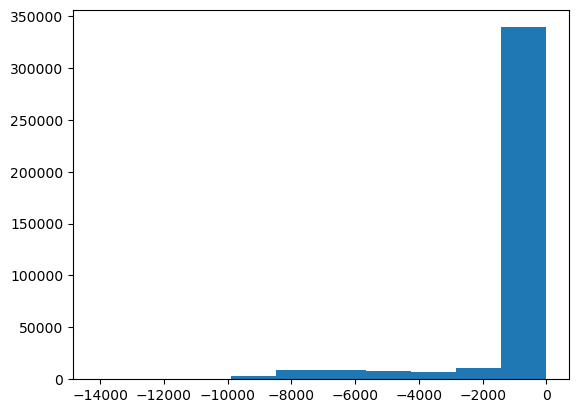

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


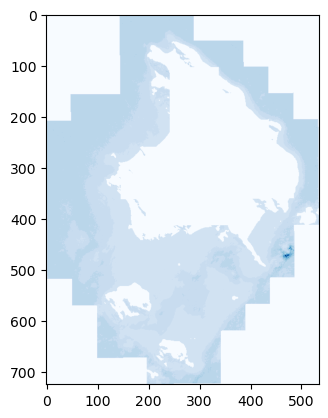

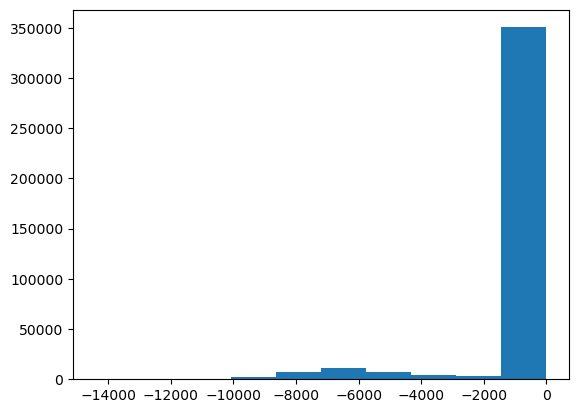

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


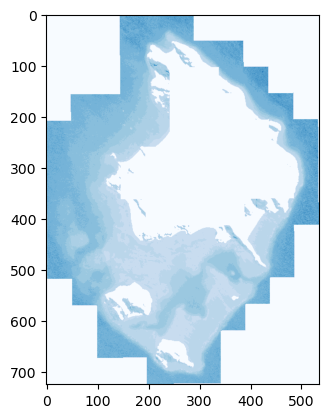

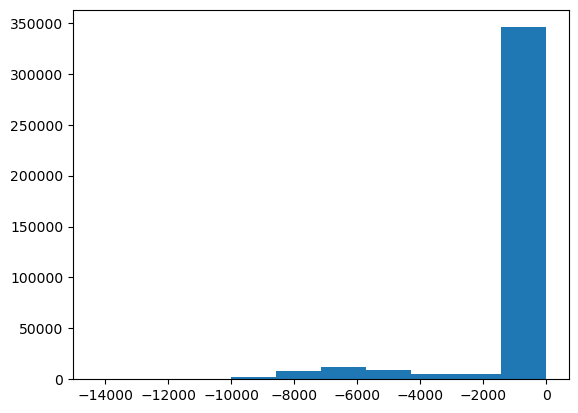

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


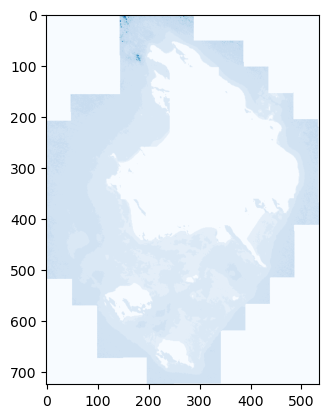

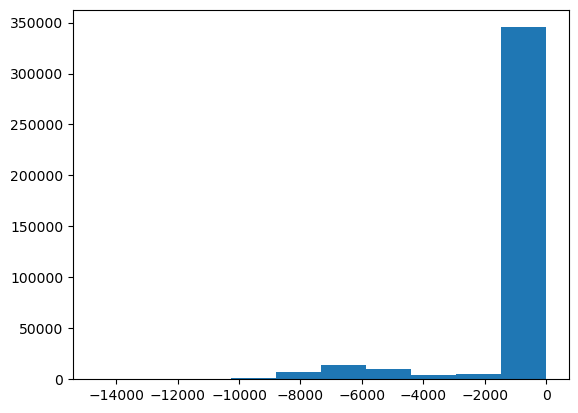

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


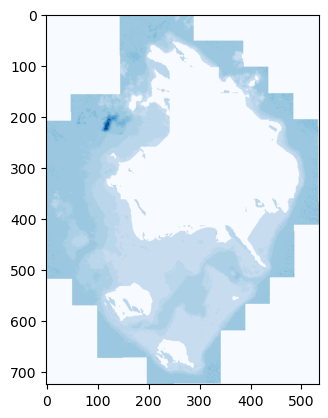

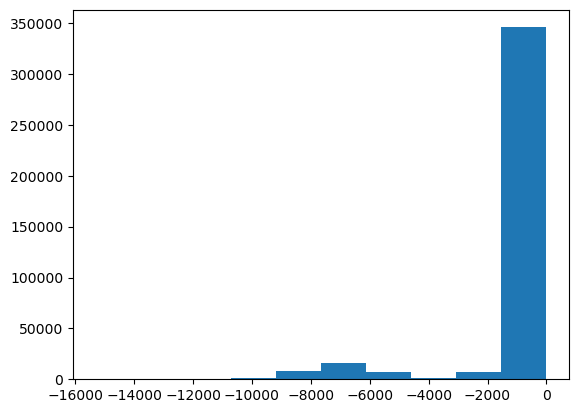

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


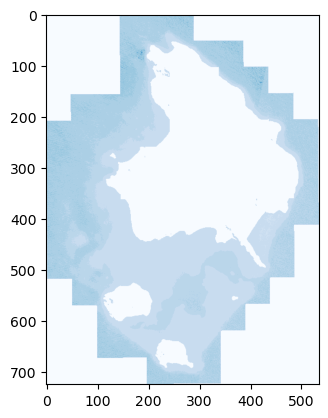

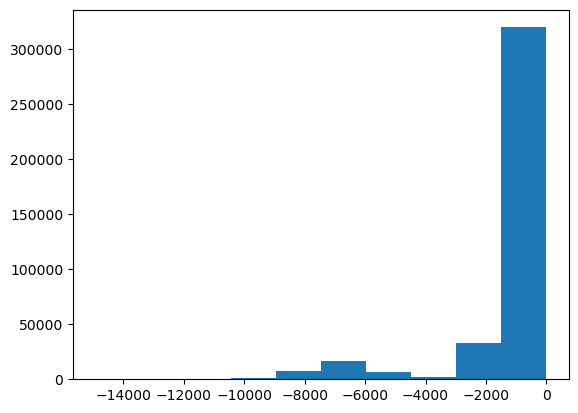

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


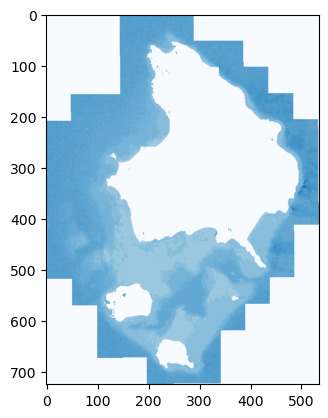

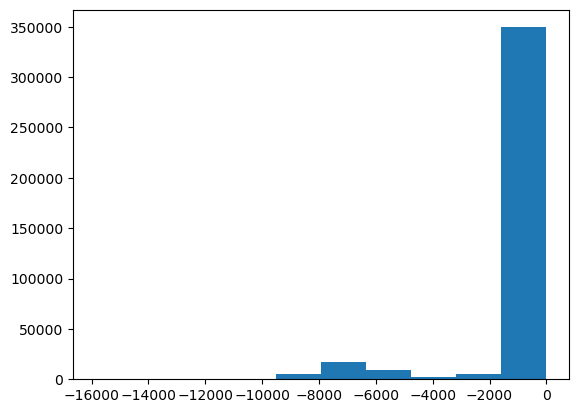

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


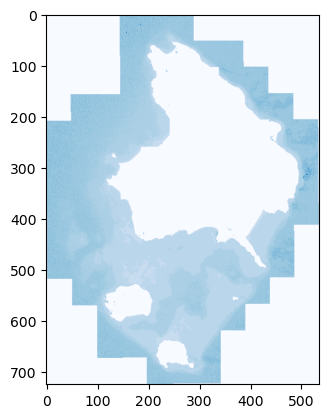

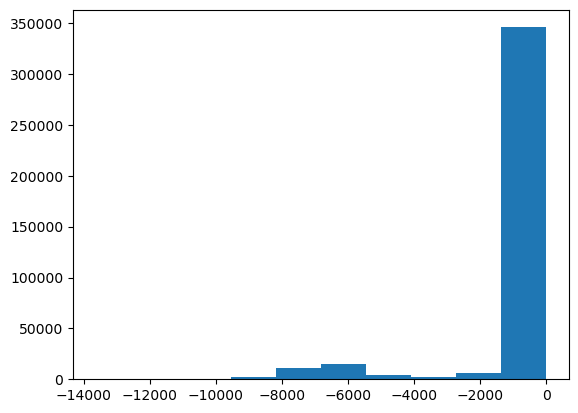

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)


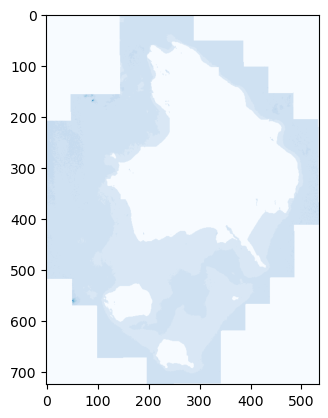

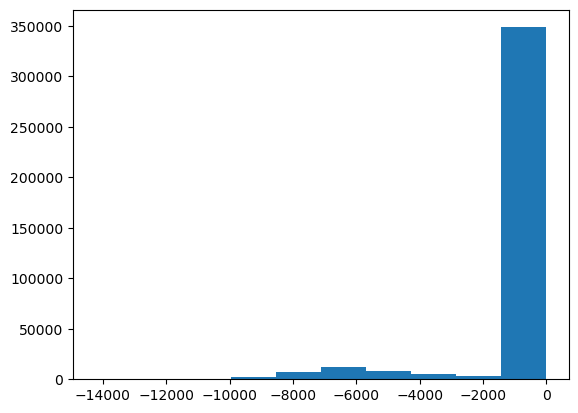

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


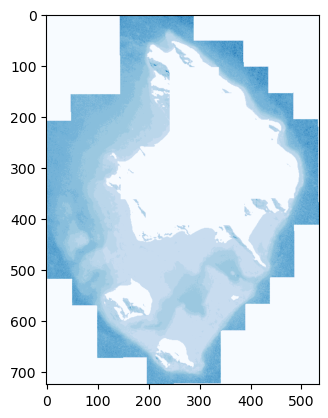

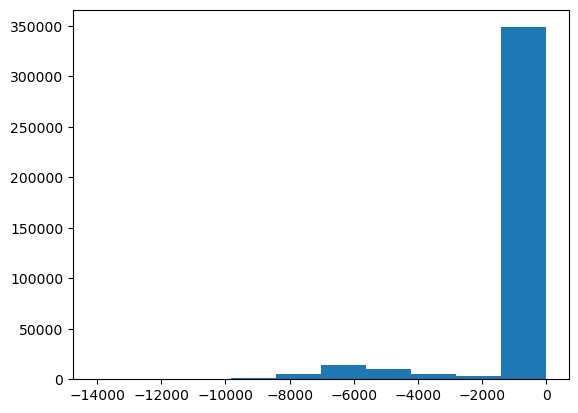

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


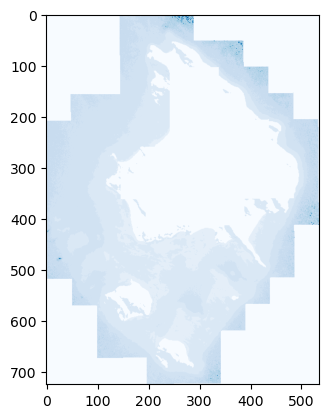

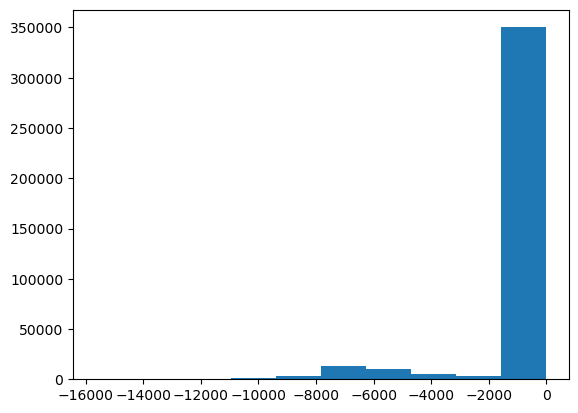

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


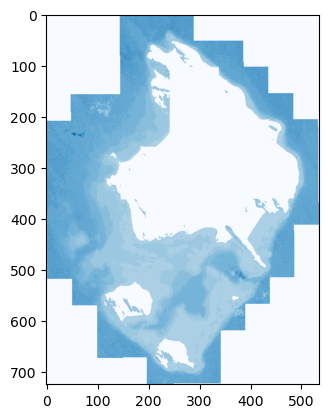

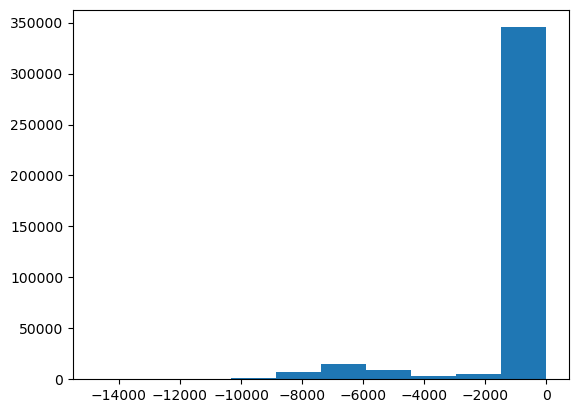

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


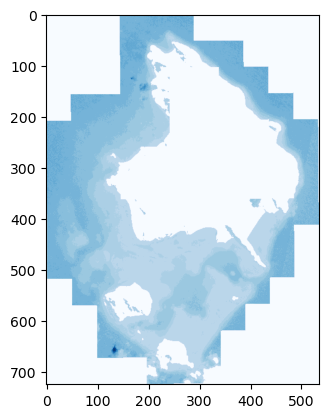

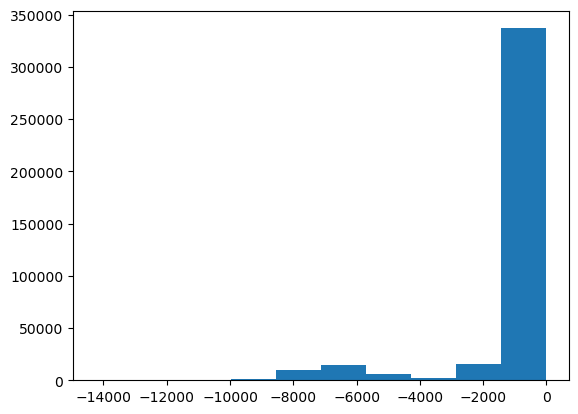

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


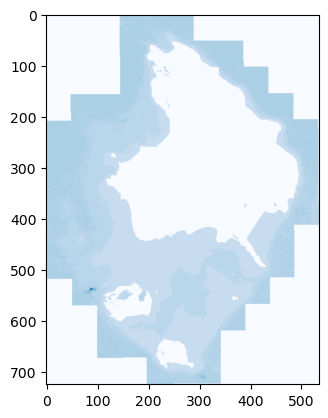

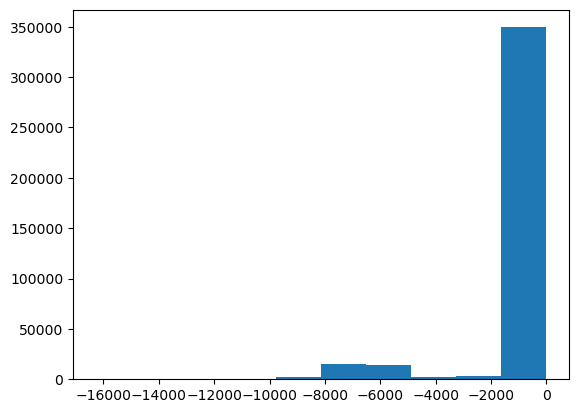

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


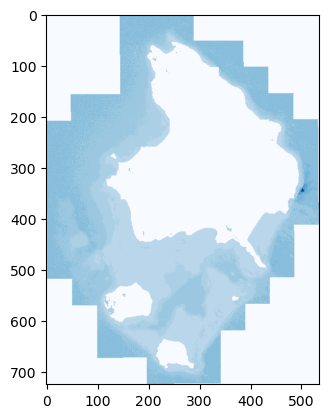

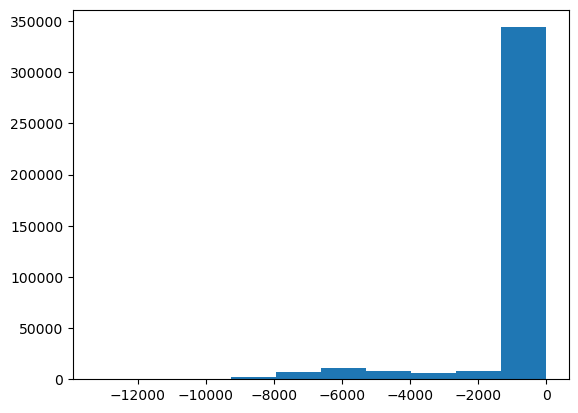

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


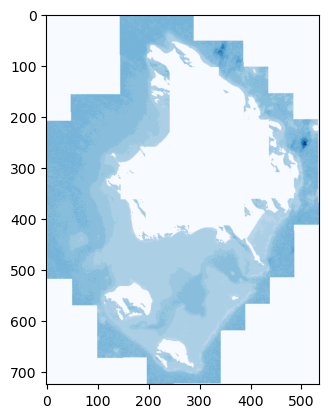

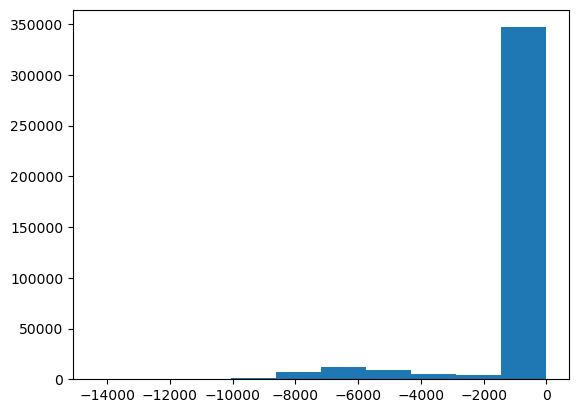

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


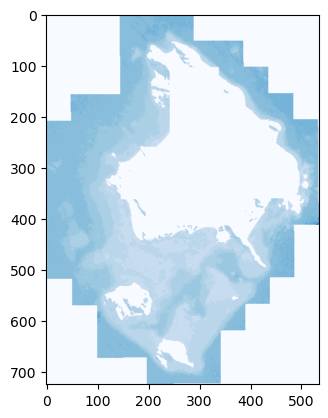

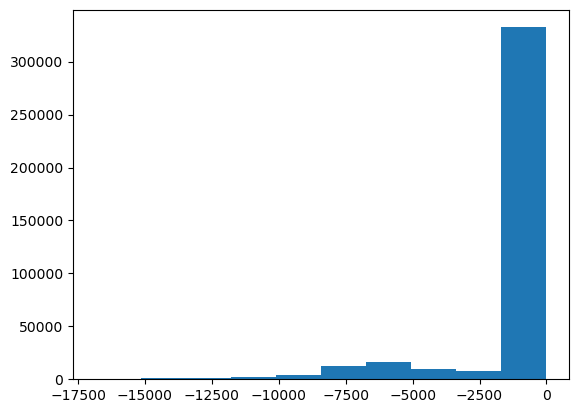

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)


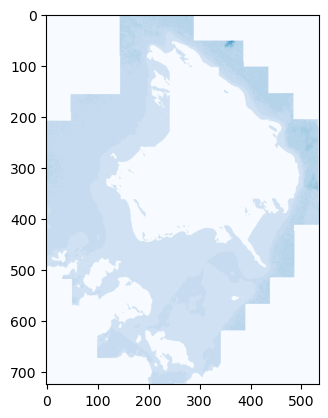

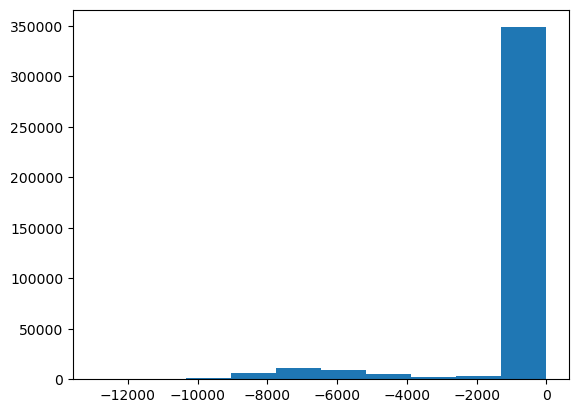

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)


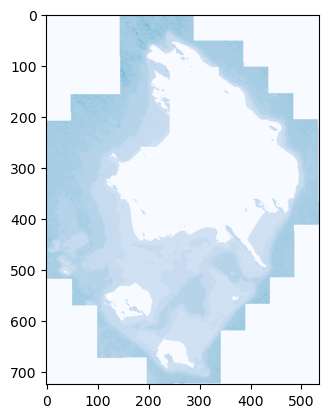

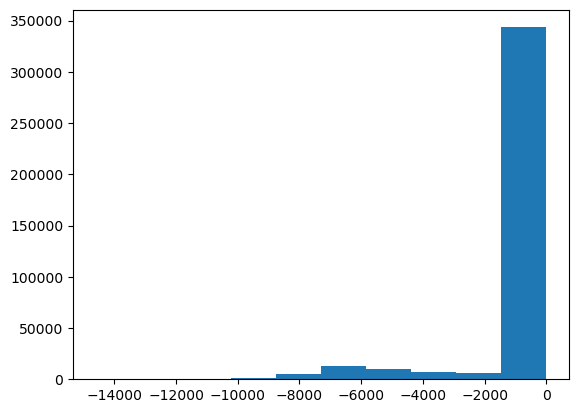

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


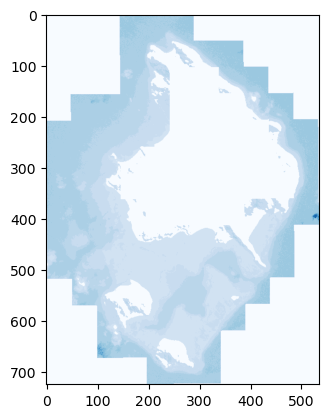

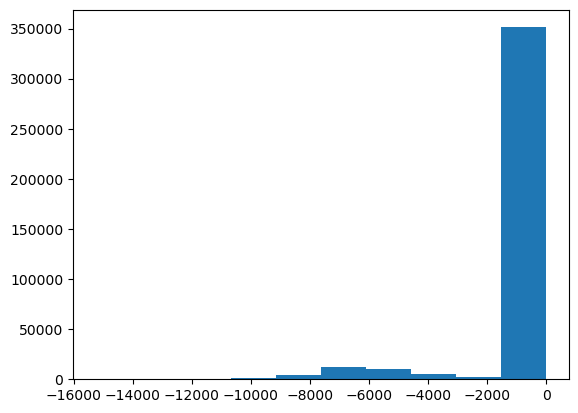

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


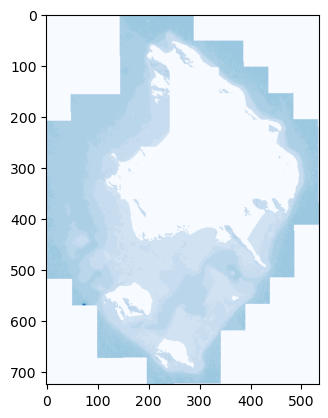

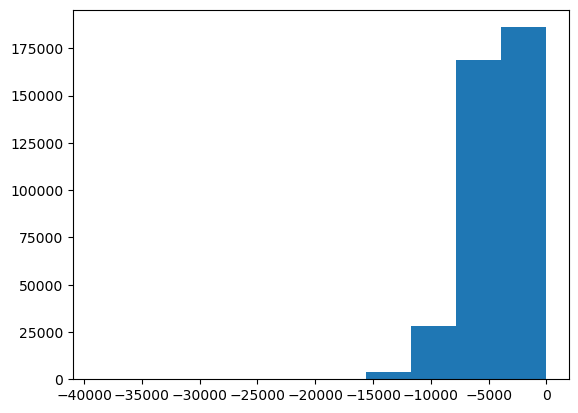

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


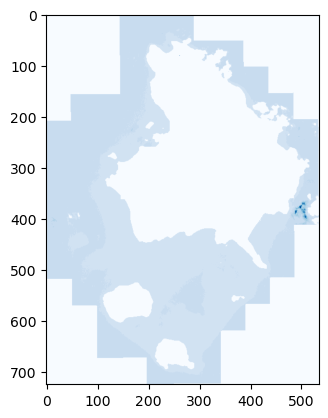

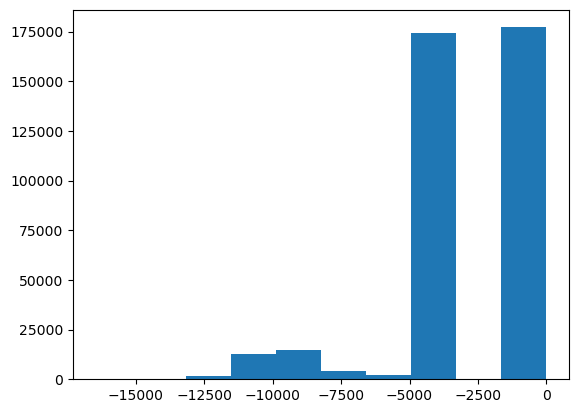

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


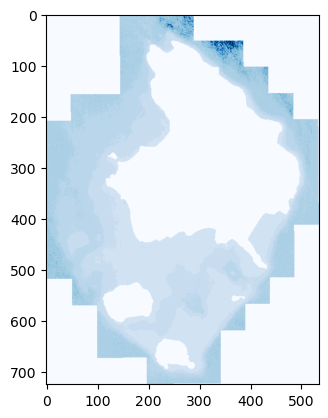

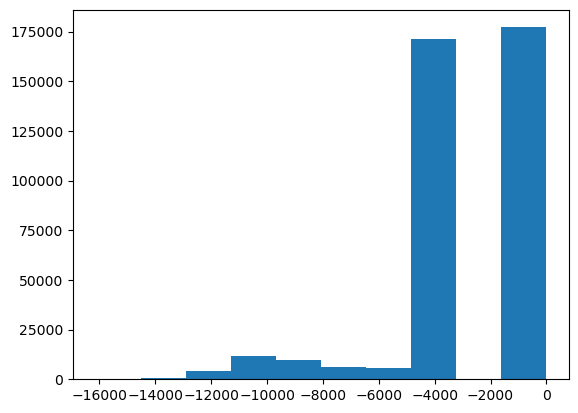

/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: invalid value encountered in divide
  pseudo_sdb = np.log(green_or_red_band / blue_band)
/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Indices.py:365: RuntimeWarning: divide by zero encountered in log
  pseudo_sdb = np.log(green_or_red_band / blue_band)


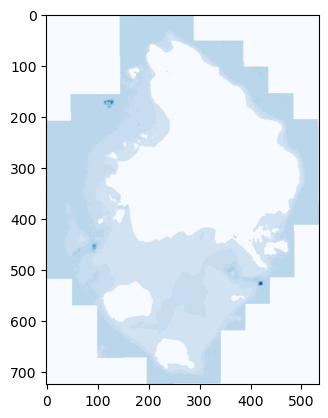

In [258]:
for file in file_list:
    img_test = ih.load_img(file)
    masked_img = ih.apply_mask(img_test, np.expand_dims(calculate_water_surface_index(tr.transform_multiband_lab(img_test)) > -5000, axis = 2))
    plt.hist(calculate_water_surface_index(tr.transform_multiband_lab(img_test)).reshape(-1,1))
    plt.show()
    depth = calculate_subsurface_depth(calculate_pseudo_subsurface_depth(tr.transform_multiband_lab(masked_img)))
    # Exclude NaN and infinity values
    valid_values = depth[np.isfinite(depth)]

    # Find the minimum value excluding NaNs and infinity
    min_value = np.nanmin(valid_values)



    max_value = 0
    num_bins = 20  # Specify the desired number of bins
    bin_edges = np.linspace(min_value, max_value, num_bins + 1)

    # Bin the values using digitize
    binned_values = np.digitize(depth, bin_edges)
    #reverse blue cmap implot of the depth
    plt.imshow(binned_values, cmap = 'Blues_r')
    plt.show()


In [ ]:
ih.plot_rgb(masked_img, plot = True)

In [ ]:
len(np.unique(np.expand_dims(depth, axis = 2)))

In [ ]:
plt.imshow(binned_values)

In [ ]:
ih.discrete_implot(binned_values)

In [ ]:
band_mean2 = np.mean((img_test), axis = (0,1))

In [ ]:
lab_img = ih.plot_lab(img_test, plot = False)

In [ ]:
ih.plot_histograms(lab_img)

In [ ]:
lab_img[:,:,0] = tr.linear_contrast_enhancement(lab_img[:,:,0])

In [ ]:
ih.plot_histograms(tr.LCE_multi(lab2rgb(lab_img)))

In [ ]:
plt.imshow(lab2rgb(lab_img))

In [ ]:
ih.plot_histograms(tr.LCE_multi(img_test - (band_median2)), plot = True)

In [ ]:
# Import the data
data = tr.LCE_multi(ih.load_img('/Users/ziad/Documents/GitHub/ShallowLearn/data/T55LCD_20160409T002712no_transform.tiff'))

In [ ]:
ih.plot_rgb(data, plot = True)

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import rasterio
from rasterio.warp import transform_geom, calculate_default_transform
from shapely.geometry import Point, Polygon


In [ ]:
coral_watch_path = os.path.join("../Data/", 'coral_watch_ala')

In [ ]:
os.listdir(coral_watch_path) 

In [ ]:
australia_coral_watch = os.path.join(coral_watch_path, 'data.xlsx')

In [ ]:
df = pd.read_excel(australia_coral_watch, sheet_name="CoralWatch Random Survey")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [ ]:
gdf['Observation date'] = pd.to_datetime(gdf['Observation date'])

In [ ]:
average_data_frame = gdf.groupby(['Observation date', 'Site Name']).mean()['Average.']

In [ ]:
grouped_data = average_data_frame.reset_index()
grouped_data['Observation date'] = pd.to_datetime(grouped_data['Observation date'])
grouped_data = grouped_data.set_index(['Observation date', 'Site Name'])

In [ ]:
# Assuming your DataFrame is named 'grouped_data' with the fixed datetime index
series_data = grouped_data['Average.']
series_data = series_data.reset_index()  # Convert DataFrame to Series
series_data['Observation date'] = pd.to_datetime(series_data['Observation date'])  # Convert to datetime type

# Plotting scatter points of average values versus observation dates
plt.figure(figsize=(15, 10))
plt.scatter(series_data['Observation date'], series_data['Average.'], s=50, marker='o')
# add another dataset to scatter
plt.scatter(dates, arr_vals, s=50, marker='o')
plt.xlabel('Observation date')
plt.ylabel('Average')
plt.title('Observation Date vs Average Australia')
plt.grid(True)
plt.show()

In [ ]:
#linear interpolate the arr_vals
from scipy.interpolate import interp1d
from matplotlib.dates import date2num



In [ ]:
dates.columns = ['Observation date']

In [ ]:
f = interp1d(date2num(dates), arr_vals, kind='linear')

In [ ]:
series_data['Observation date'] = pd.to_datetime(series_data['Observation date'])

In [ ]:
# remove seconds from pd.datetime
series_data['Observation date'] = series_data['Observation date'].dt.floor('d')

In [ ]:
f2 = interp1d(date2num(series_data['Observation date']), series_data['Average.'], kind='linear')

In [ ]:
plt.plot(dates, f2(date2num(dates)),'o')

In [ ]:
plt.plot(dates, f2(date2num(dates)),'o')

In [ ]:
# generate a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


#define a cross val for linear regression model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# do a 10 fold cross validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LinearRegression()
# train model
scores = cross_val_score(model, np.expand_dims(np.array(arr_vals), axis = 1), f2(date2num(dates)), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)



In [ ]:
#check the score of the mean 
mean_values = series_data['Average.'].mean()
#check how well the model performs compared to the mean
mean_squared_error(f2(date2num(dates)), np.full(len(dates), mean_values))
from sklearn.metrics import mean_absolute_error
mean_absolute_error(f2(date2num(dates)), np.full(len(dates), mean_values))

In [ ]:
np.mean(scores)

In [ ]:
# predict the average values from the observation dates
y_predicted = regression_model.predict(series_data['Observation date'].values.reshape(-1, 1))